<a href="https://colab.research.google.com/github/pgurav-rgng/DSCapstone/blob/master/Gene_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1> Introduction and Background </H1>

Gene expression is a fundamental biological process where information encoded in a gene is used to direct the synthesis of proteins or other molecules, which are essential for cellular functions. The regulation of gene expression plays a critical role in determining the phenotype of a cell, tissue, or organism, and any aberrations in this process can lead to various diseases, including cancer and genetic disorders.

Predicting gene expression levels from DNA sequence data is a significant area of research in genomics and bioinformatics. The ability to accurately predict how genes will be expressed based on their DNA sequence allows scientists to better understand gene regulation, identify potential disease mechanisms, and develop targeted therapies. This predictive modeling bridges the gap between static genetic information and dynamic biological outcomes, offering insights into how variations in DNA can lead to changes in gene expression and ultimately affect health and disease.

Understanding and predicting gene expression from DNA sequences involve integrating various factors, including promoter regions, enhancer elements, transcription factor binding sites, and epigenetic modifications. The complexity of this task makes it a challenging yet promising area of research, with potential applications ranging from understanding fundamental biological processes to developing precision medicine strategies.

To conduct this analysis on predicting gene expression levels, I obtained a dataset from the ENCODE Project (https://www.encodeproject.org/). ENCODE provides comprehensive data on regulatory elements in the human genome, including DNA sequences and corresponding gene expression levels across various cell types. For this case study, i will focus on a specific subset of this data, which includes sequences from promoter regions and corresponding RNA-seq data that quantifies gene expression.

In this notebook, I will preprocess the data, engineer relevant features (e.g., nucleotide compositions, motifs), and apply machine learning models to predict gene expression levels. The workflow will include data loading, preprocessing, feature extraction, model training, and evaluation. I will use Python libraries such as Pandas for data manipulation, Scikit-learn for machine learning, and Matplotlib for visualization, ensuring the notebook is comprehensive and accessible for those familiar with basic Python programming and bioinformatics concepts.

<H3>Pradeep Gurav</H3>
24th August 2024

<h2>Data Preprocessing and Exploration</h2>

<h3>Data Loading</h3>

To download the data file for predicting gene expression levels from DNA sequence data from the ENCODE project

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE50760

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.3 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO

# Load the DNA sequences from the FASTA file
sequences = list(SeqIO.parse("gene.fna", "fasta"))

# Example: Print the first sequence and its length
first_seq = sequences[0].seq
second_seq = sequences[1].seq
print(f"First Sequence: {first_seq}")
print(f"Length of First Sequence: {len(first_seq)}")

# Calculate total number of sequences
total_sequences = len(sequences)
print(f"Total Number of Sequences: {total_sequences}")

# Calculate the average length of sequences
average_length = sum(len(seq.seq) for seq in sequences) / total_sequences
print(f"Average Sequence Length: {average_length}")


First Sequence: AAGAGAGGAGATAGATTGGGGAGCAGGGAGAAGGATATGGAAGAATCACAGGCATCTAGCCTCGACCTGGAAGAAAGGCAGGGTAACAGACCATGTAGGATAGTCTGGGAGAGGAATCATAGTTGGGAAGAGGATGACGAGCTTAGTATTGGATGTGTTGCATTGGGATTGTCAGGGGTAAACTGAAATAGAGACACAAACAGCCTAATGTCAGAAGCTCAGGTTCACAAGGCAAAATTTGTGAGTGTATTAGTTTCCTACAGCTGCTGTAAAAAAAATTATCAAAAATGCAGTGGCTTGAAACAATACACATTATCCTCTTATAGCTTTGGAGATCAGAAATCTCAAATGAGTCTCACTGAAATTAAGTTGTCAGCTGGGCTGCATTCCTTCTGGAGCCTCCAGGGAAATAATTTGTCTCTGTGTCTTTTCCAGCTTCTCTATGCCACCTGAATTCCTTGGCTTGCAGCCCCTTCTTCCATCTTCAAAGCGAGTAGTTGAGTGTCTTCAAGTATTTCTGATTGTTACTCTCCTGCCTCCTTCTTTTACGTATAAGGATCTTTGTGATTACATTGGTCCCACCAGGAAAATCTACACACCTGCAAAGTCCCTTTTGCCACGTAAGACAACTTATTCTCAGGTTCCAGGAGTTAGGACATACACACCTTTGTGGGGGTGGGGAGCAGTATTCTGTCTACCACAGGAAGCATTTATATAGAGGTAATAATTAAATTTAACTTTTTATTATTCTCTATGCCCAAGAGAATGTGGGTAAAAAGAGAAGTCCAGAGTGCTAAAGAACAAGACTTTCTCATCGTGTTTTCCCATATCCTCTTCCTGTTTCTCTTTTCAGTATCAGGGTTAATTCTTGTCACCCACTGTATTTCCCTCCCCACTCTTTTAACTGCTCTCCAGTGTCTTATCAACAAAGGCTTCAACTCTGGTGCTAAAAGAGAGTGATTTCATTTTTTTAAGTTAATTTTT

Code for GC Content Calculation and Visualization

GC Content of First Sequence: 0.38%


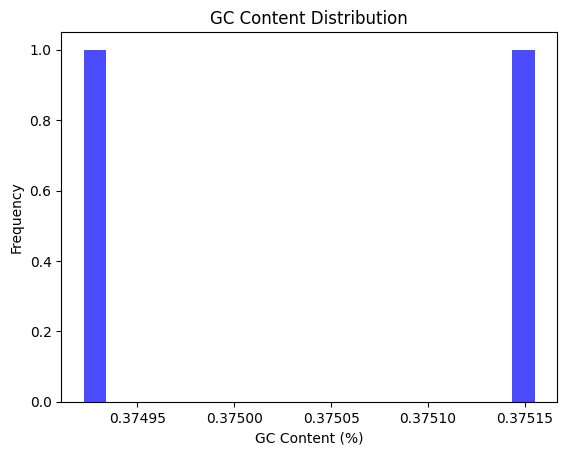

In [ ]:
from Bio.SeqUtils import gc_fraction
import matplotlib.pyplot as plt

# Calculate GC content for each sequence
gc_contents = [gc_fraction(seq.seq) for seq in sequences]

# Print GC content of the first sequence
print(f"GC Content of First Sequence: {gc_contents[0]:.2f}%")

# Plotting the GC content distribution
plt.hist(gc_contents, bins=20, color='blue', alpha=0.7)
plt.title('GC Content Distribution')
plt.xlabel('GC Content (%)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
def kmer_counts(sequence, k=3):
    """Convert a DNA sequence to k-mer counts."""
    kmer_count = {}
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i + k]
        if kmer in kmer_count:
            kmer_count[kmer] += 1
        else:
            kmer_count[kmer] = 1
    return kmer_count


kmer_counts_seq1 = kmer_counts(first_seq)
kmer_counts_seq2 = kmer_counts(second_seq)

print(kmer_counts_seq1)
print(kmer_counts_seq2)

{Seq('AAG'): 595, Seq('AGA'): 630, Seq('GAG'): 436, Seq('AGG'): 490, Seq('GGA'): 442, Seq('GAT'): 404, Seq('ATA'): 635, Seq('TAG'): 403, Seq('ATT'): 823, Seq('TTG'): 548, Seq('TGG'): 454, Seq('GGG'): 319, Seq('AGC'): 315, Seq('GCA'): 375, Seq('CAG'): 478, Seq('GAA'): 596, Seq('TAT'): 662, Seq('ATG'): 562, Seq('AAT'): 795, Seq('ATC'): 394, Seq('TCA'): 562, Seq('CAC'): 363, Seq('ACA'): 584, Seq('GGC'): 257, Seq('CAT'): 553, Seq('TCT'): 610, Seq('CTA'): 399, Seq('GCC'): 221, Seq('CCT'): 374, Seq('CTC'): 317, Seq('TCG'): 46, Seq('CGA'): 48, Seq('GAC'): 242, Seq('ACC'): 270, Seq('CTG'): 475, Seq('AAA'): 1129, Seq('GGT'): 287, Seq('GTA'): 340, Seq('TAA'): 678, Seq('AAC'): 399, Seq('CCA'): 387, Seq('TGT'): 585, Seq('AGT'): 477, Seq('GTC'): 249, Seq('GTT'): 427, Seq('TGA'): 559, Seq('ACG'): 59, Seq('GCT'): 358, Seq('CTT'): 569, Seq('TTA'): 696, Seq('GTG'): 395, Seq('TGC'): 382, Seq('ACT'): 418, Seq('CAA'): 514, Seq('TTC'): 575, Seq('TTT'): 1147, Seq('TCC'): 317, Seq('TAC'): 327, Seq('CCC'): 23

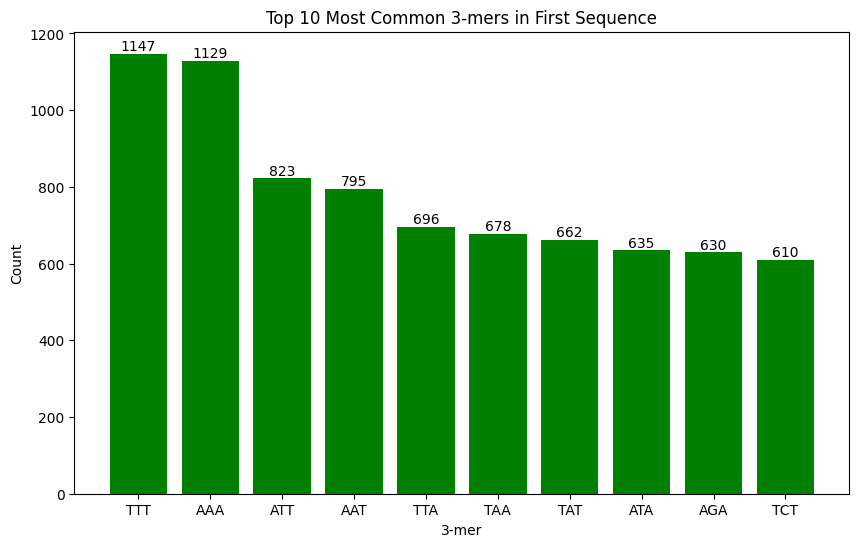

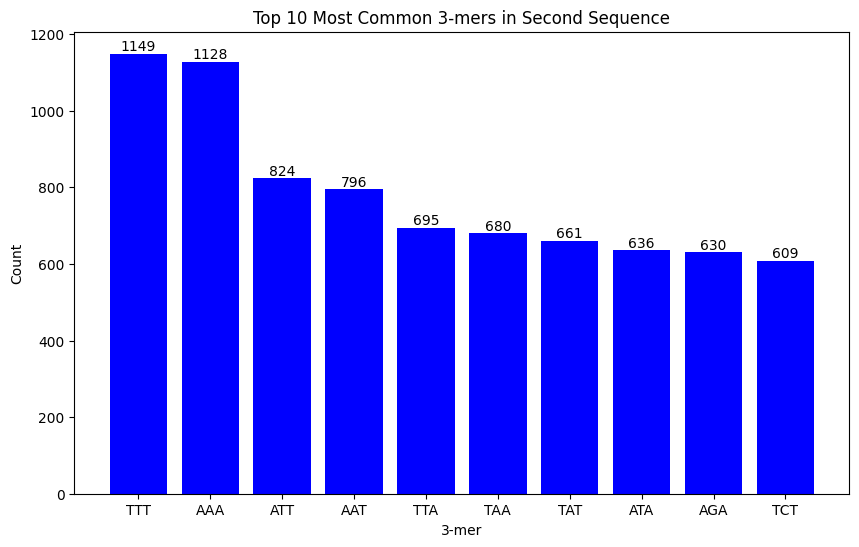

In [ ]:
# Plot for the first sequence
plt.figure(figsize=(10, 6))
bars = plt.bar(kmers_seq1, counts_seq1, color='green')
plt.title(f'Top 10 Most Common {k}-mers in First Sequence')
plt.xlabel(f'{k}-mer')
plt.ylabel('Count')

# Add count labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), va='bottom', ha='center')

plt.show()

# Plot for the second sequence (similarly add labels)
plt.figure(figsize=(10, 6))
bars = plt.bar(kmers_seq2, counts_seq2, color='blue') # Changed color to blue
plt.title(f'Top 10 Most Common {k}-mers in Second Sequence')
plt.xlabel(f'{k}-mer')
plt.ylabel('Count')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), va='bottom', ha='center')

plt.show()

<h3>Feature Engineering and Data Preparation</h3>

In this section, we will transform the k-mer counts and GC content into features that the machine learning model can use. We'll also prepare our dataset by combining these features with expression levels from our RNA-seq data (or any other data source we decide on).

In [ ]:
import pandas as pd

def create_feature_dataframe(gc_content, kmer_counts):
    """Create a dataframe with GC content and k-mer counts as features."""
    features = {'GC_Content': gc_content}
    features.update(kmer_counts)
    return pd.DataFrame([features])

# Example usage with our previously calculated values:
gc_content_seq1 = 0.37
gc_content_seq2 = 0.38

# Assuming kmer_counts_seq1 and kmer_counts_seq2 are dictionaries with 3-mer counts
features_seq1 = create_feature_dataframe(gc_content_seq1, kmer_counts_seq1)
features_seq2 = create_feature_dataframe(gc_content_seq2, kmer_counts_seq2)

# Combine the feature sets into one dataset
features_df = pd.concat([features_seq1, features_seq2], ignore_index=True)

print(features_df.head())



   GC_Content  (A, A, G)  (A, G, A)  (G, A, G)  (A, G, G)  (G, G, A)  \
0        0.37        595        630        436        490        442   
1        0.38        595        630        435        489        441   

   (G, A, T)  (A, T, A)  (T, A, G)  (A, T, T)  ...  (T, T, C)  (T, T, T)  \
0        404        635        403        823  ...        575       1147   
1        404        636        403        824  ...        575       1149   

   (T, C, C)  (T, A, C)  (C, C, C)  (G, C, G)  (C, G, T)  (C, G, G)  \
0        317        327        232         37         62         42   
1        317        327        233         40         61         43   

   (C, C, G)  (C, G, C)  
0         47         37  
1         47         36  

[2 rows x 65 columns]


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def create_feature_dataframe(gc_content, kmer_counts):
    """Create a dataframe with GC content and k-mer counts as features."""
    # Convert k-mer tuples to strings for column names
    features = {'GC_Content': gc_content}
    features.update({"".join(kmer): count for kmer, count in kmer_counts.items()})
    return pd.DataFrame([features])

# ... (rest of your code remains the same)

# Assuming features_df is your dataframe with GC_Content and k-mer counts

# Convert all column names to strings
features_df.columns = features_df.columns.astype(str)  # This is the key change

scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
normalized_features = scaler.fit_transform(features_df)

# Convert the normalized data back to a dataframe
normalized_features_df = pd.DataFrame(normalized_features, columns=features_df.columns)

# Show the normalized features
print(normalized_features_df.head())

   GC_Content  AAG  AGA  GAG  AGG  GGA  GAT  ATA  TAG  ATT  ...  TTC  TTT  \
0         0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1         1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  1.0   

   TCC  TAC  CCC  GCG  CGT  CGG  CCG  CGC  
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
1  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  

[2 rows x 65 columns]
